<a href="https://colab.research.google.com/github/karnali/covid_19_colab/blob/master/coronavirus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Reading the dataset https://github.com/CSSEGISandData/2019-nCoV
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-23-2020.csv')
                 

In [16]:
# Let's look at the various columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3415 entries, 0 to 3414
Data columns (total 12 columns):
FIPS              3151 non-null float64
Admin2            3172 non-null object
Province_State    3253 non-null object
Country_Region    3415 non-null object
Last_Update       3415 non-null object
Lat               3415 non-null float64
Long_             3415 non-null float64
Confirmed         3415 non-null int64
Deaths            3415 non-null int64
Recovered         3415 non-null int64
Active            3415 non-null int64
Combined_Key      3415 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 320.3+ KB


In [17]:
df.describe()

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active
count,3151.000000,3415.000000,3415.000000,3415.000000,3415.000000,3415.000000,3415.000000
mean,30481.562679,36.951830,-83.272384,110.772182,4.830747,29.563104,63.149048
std,15293.975742,9.922987,38.464430,1885.282366,128.528026,1047.427939,1199.575078
min,1001.000000,-42.882100,-170.132000,0.000000,0.000000,0.000000,0.000000
25%,18182.000000,34.007557,-97.651109,0.000000,0.000000,0.000000,0.000000
50%,29185.000000,38.087801,-89.149216,0.000000,0.000000,0.000000,0.000000
75%,45090.000000,41.743500,-81.904038,3.000000,0.000000,0.000000,0.000000
max,99999.000000,71.706900,178.065000,67800.000000,6077.000000,59882.000000,50418.000000


In [18]:
# Countries affected
countries = df['Country_Region'].unique().tolist()
# print(countries)

print("\nTotal countries affected by virus: ",len(countries))


Total countries affected by virus:  168


In [19]:
#Combining China and Mainland China cases
df['Country_Region'].replace({'Mainland China':'China'},inplace=True)
countries = df['Country_Region'].unique().tolist()
print(countries)
print("\nTotal countries affected by virus: ",len(countries))



['US', 'Canada', 'China', 'Netherlands', 'Australia', 'United Kingdom', 'Cruise Ship', 'Denmark', 'France', 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Irel

In [20]:
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', None)

# Creating a dataframe with total no of confirmed cases for every Country_Region
Number_of_countries = len(df['Country_Region'].value_counts())
cases = pd.DataFrame(df.groupby('Country_Region')['Confirmed','Deaths'].sum())
cases['Country_Region'] = cases.index

global_cases = cases[['Confirmed','Deaths']]


dfsort = global_cases.sort_values(by = ['Deaths'], ascending = False)
print ("Countries sorted by most deaths")
display(dfsort)
dfsort.to_csv('today.csv',index=True)


Countries sorted by most deaths


,Confirmed,Deaths
Country_Region,,
Italy,63927,6077
China,81496,3274
Spain,35136,2311
Iran,23049,1812
France,20123,862
US,43667,552
United Kingdom,6726,336
Netherlands,4764,214
Germany,29056,123


In [21]:
dfglobal = pd.read_csv("today.csv")
dfglobal['Death_Percent'] = round((dfglobal['Deaths'] / dfglobal['Confirmed']) *100,2)
dfglobal = dfglobal.sort_values(by = ['Death_Percent'], ascending = False)
dfglobal.head(10)


,Country_Region,Confirmed,Deaths,Death_Percent
68,Sudan,2,1,50.00
85,Gambia,2,1,50.00
75,Zimbabwe,3,1,33.33
80,Gabon,5,1,20.00
23,San Marino,187,20,10.70
0,Italy,63927,6077,9.51
54,Bangladesh,33,3,9.09
20,Iraq,266,23,8.65
12,Indonesia,579,49,8.46
3,Iran,23049,1812,7.86


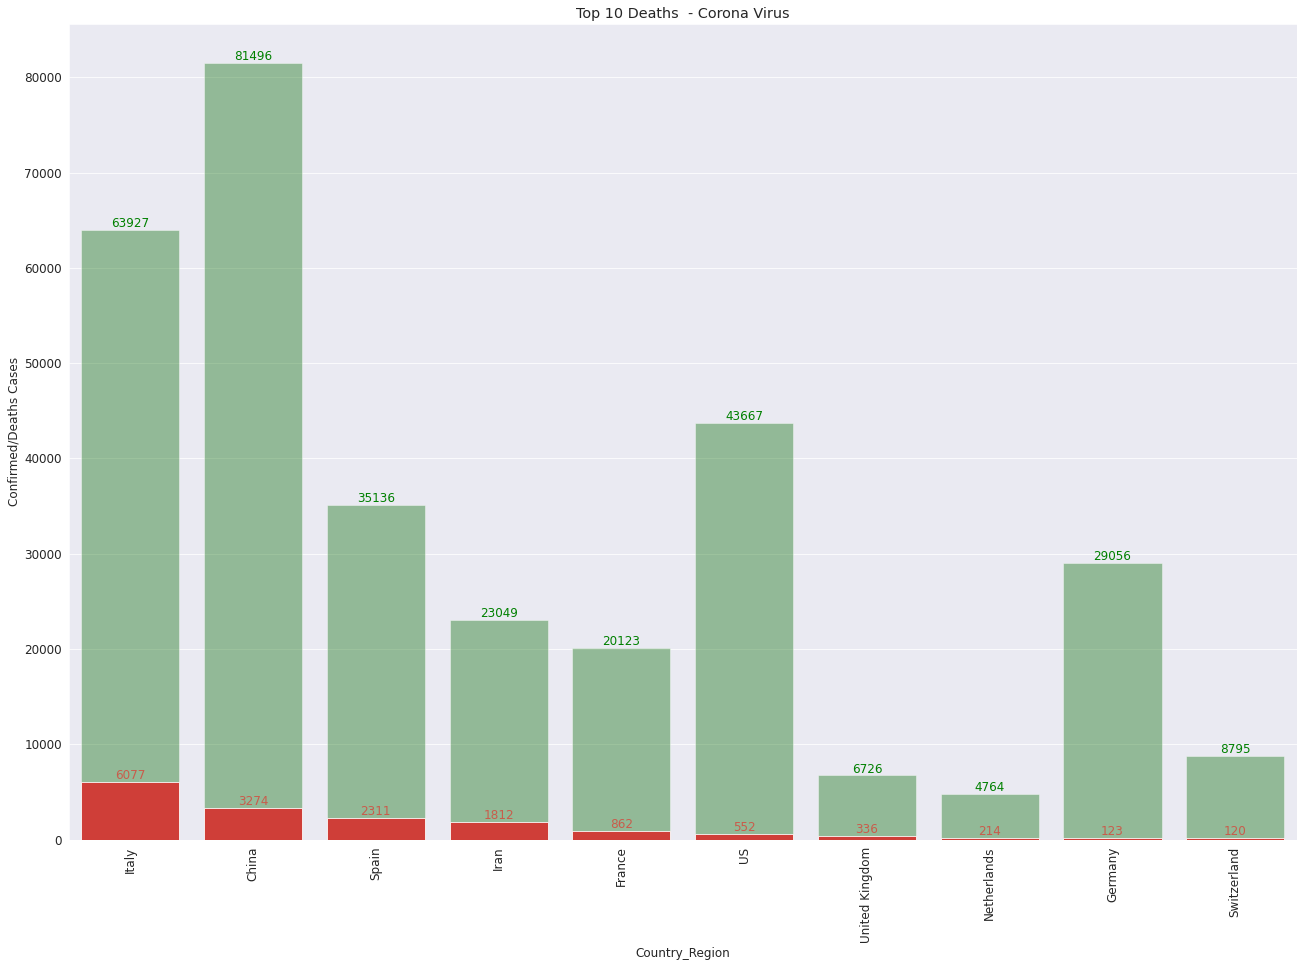

In [24]:
sns.set_style("darkgrid")
#plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.figure(figsize=(22,15))
plt.rcParams['font.family'] = "Arial"
plt.rcParams['font.size'] = "12"

dfglobal = pd.read_csv("today.csv",  skiprows = range(11,200))

g =sns.barplot(x='Country_Region',y='Confirmed',color='Green', alpha=0.4, data=dfglobal)
g =sns.barplot(x='Country_Region',y='Deaths',color='red', alpha=0.8, data=dfglobal)
g.set_ylabel('Confirmed/Deaths Cases')

for index, row in dfglobal.iterrows():
    g.text(row.name,row.Confirmed, round(row.Confirmed,2), color='Green', ha='center', va='bottom')
    g.text(row.name,row.Deaths, round(row.Deaths,2), color='red', alpha=0.5, ha='center', va='bottom')

plt.title('Top 10 Deaths  - Corona Virus')
g.set_xticklabels(dfglobal['Country_Region'], rotation='vertical', fontsize=12)
plt.show()


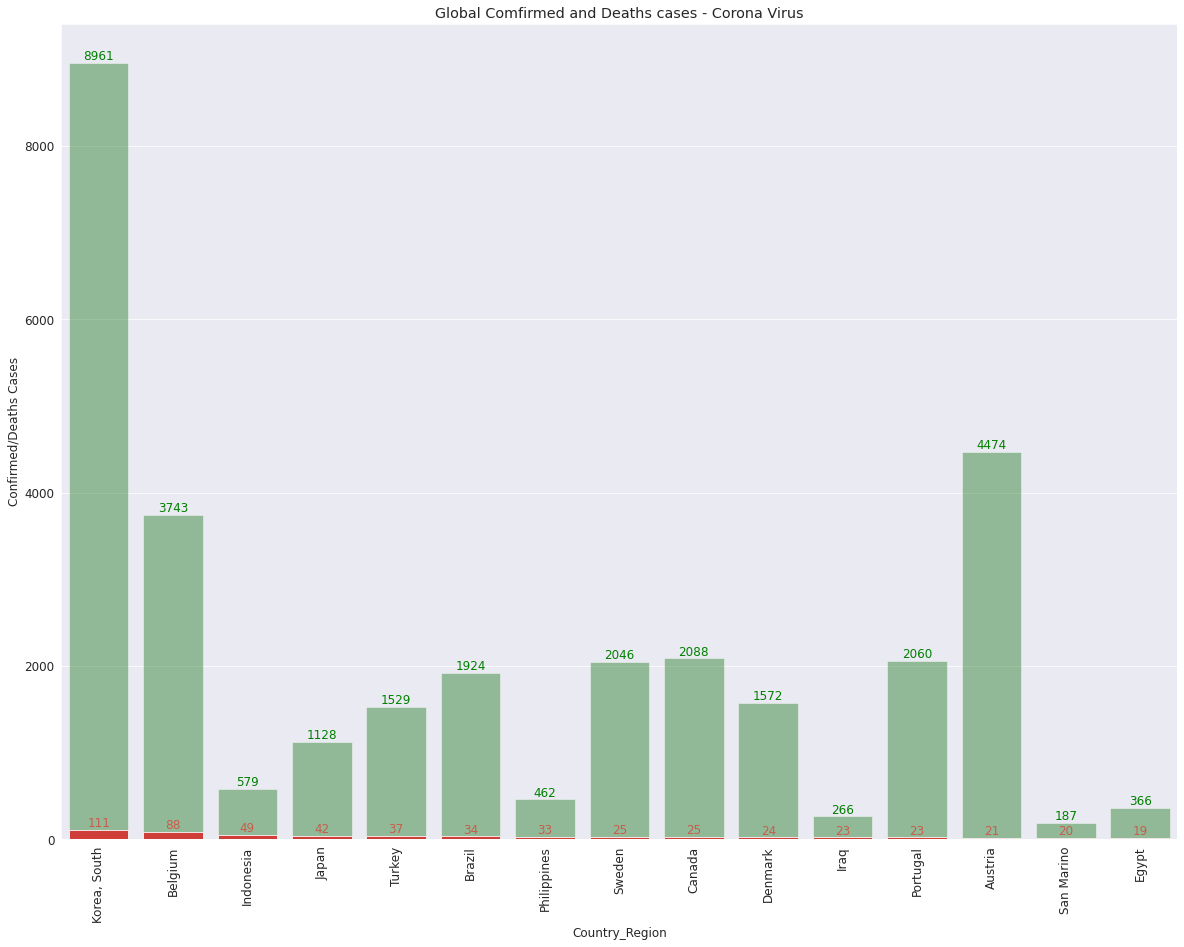

In [23]:
sns.set_style("darkgrid")
nbr_rows_to_skip = range(1,11)
nbr_rows_to_read = 15
#plt.rcParams['figure.figsize'] = (22.0, 15.0)
plt.figure(figsize=(20,15))
plt.rcParams['font.family'] = "Arial"
plt.rcParams['font.size'] = "12"

dfglobal = pd.read_csv("today.csv",  nrows=nbr_rows_to_read, skiprows=nbr_rows_to_skip)

g =sns.barplot(x='Country_Region',y='Confirmed',color='Green', alpha=0.4, data=dfglobal)
g =sns.barplot(x='Country_Region',y='Deaths', color='red', alpha=0.8, data=dfglobal)
g.set_ylabel('Confirmed/Deaths Cases')

for index, row in dfglobal.iterrows():
    g.text(row.name,row.Confirmed, round(row.Confirmed,2), color='Green', ha='center', va='bottom')
    g.text(row.name,row.Deaths, round(row.Deaths,2), color='red', alpha=0.5, ha='center', va='bottom')
    
    
plt.title('Global Comfirmed and Deaths cases - Corona Virus')
g.set_xticklabels(dfglobal['Country_Region'], rotation='vertical', fontsize=12)
plt.show()

